# Spotify: Top songs
                                              -Top songs listened in 2019 on spotify

<img src="https://b8g9x2x5.rocketcdn.me/wp-content/uploads/2018/08/spotify-logo-1920x1080_fouoik.jpg">

### Content

<font color='green'>
    
* [Introduction: Spotify](#Introduction)
* [Data description and objectives](#Data_description_and_objectives)
* [Spotify trends: data acquisiton, manipulation and validation](#Analysis_of_Spotify_trends)
* [Data visualizations](#Data_visualizations) 
* [Conclusion](#Conclusion)

<a id="Introduction"></a>
## 1.Introduction

<a id="Data_description_and_objectives"></a>
## 2.Data description and objectives

Based on the above description of Spotify, it is clear that this platform is very well known in all countries and is a major music service that gives you access to millions of songs. And in this analysis I am interested in comparing different characteristics.

Below is data that we will be scraped and used for our analysis:

+ Title- Song's title
+ Artist- Song's artist
+ Genre- the genre of the track
+ Year-song release date.
+ Bpm-Beats.Per.Minute - The tempo of the song.
+ Nrgy-Energy- The energy of a song - the higher the value, the more energtic. song
+ Dnce-Danceability - The higher the value, the easier it is to dance to this song.
+ dB-Loudness..dB.. - The higher the value, the louder the song.
+ Valence - The higher the value, the more positive mood for the song.
+ Dur-Length - The duration of the song.
+ Spch-speechiness - The higher the value the more spoken word the song contains.
+ Pop-Popularity- The higher the value the more popular the song is.
+ Country-where is this song popular mostly.
+ info: https://www.kaggle.com/leonardopena




For this project, data analysis and visualization contains 5 parts:

1. Analysis for music trends and how top charts are structured ?
2. What genre is the most listened to? And provide examples.
3. What is the main difference and advantages of the Spotify comparable to other music platforms ?
4. What should artists do to place their songs, lyrics and etc to Spotify (requirements and process of releasing)?
5. What is Spotify's effect on national economics ?



<a id="Analysis_of_Spotify_trends"></a>
## 3. Data acquisiton, manipulation and validation

### 3.1. Data acquisiton: Scraping information about Spotify

In [141]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import date, timedelta
from time import time
from time import sleep
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [142]:
df = pd.read_csv("top.csv", sep="," , encoding='latin-1')

In [143]:
base_url = 'https://spotifycharts.com/regional/'
start = date(2019, 1, 1)
end = date(2019, 12, 31)

iter = timedelta(days=1)

start_time = time()
serve = 0

mydate = start

while mydate < end:

    if(mydate > end):
        break

    # combining base_url with the formatted mydate variable to get each iteration of dates for the whole dataset

    r = requests.get(base_url + mydate.strftime('%Y-%m-%d'))
    mydate += iter

    #pause the loop
    sleep(randint(1,3))

    # monitor requests
    serve += 1
    elapsed_time = time() - start_time

    # using bs4 to create variable to clean up site content

    soup = BeautifulSoup(r.text, 'html.parser')

    # establishing where data we are interested starts and ends

    chart = soup.find('table', {'class': 'chart-table'})

    tbody = chart.find('tbody')

    # empty array to be used for holding all variables we are scraping

    all_rows = []

    # actual scraping

    for tr in tbody.find_all('tr'):

        # scrape rank for each chart position

        rank_text = tr.find('td', {'class': 'chart-table-position'}).text

        # scrape artist name for each position and remove "by " so we only get artist name

        artist_text = tr.find('td', {'class': 'chart-table-track'}).find('span').text
        artist_text = artist_text.replace('by ','').strip()

        # scrape title of track for each position

        title_text = tr.find('td', {'class': 'chart-table-track'}).find('strong').text

        # scrape number of streams for each position
        streams_text = tr.find('td', {'class': 'chart-table-streams'}).text

        # do this to get program to start on first date 1/1/2019 instead of 1/2/2019
        date = (mydate - iter)

        # appending all variables we scraped to all_rows empty array and adding date to see exactly at which dates
        # program is failing to update skip variable, also for analysis for later when doing time series and regression
        all_rows.append( [rank_text, artist_text, title_text, streams_text, date.strftime('%Y-%m-%d')] )

    # create dataframe array to store all data

    df = pd.DataFrame(all_rows, columns =['Rank','Artist','Title','Streams', 'Date'])
    print(df)

    # writing csv file to output results
    with open('Spotify200chart.csv', 'a') as f:
        df.to_csv(f, header=False, index=False)

AttributeError: 'NoneType' object has no attribute 'find'

### 3.2. Data manipulation: cleaning and shaping


In [ ]:
df

In [144]:
#Renaming the column name
df.rename(columns={'top genre':'genre'},inplace=True)
df.head()

,Unnamed: 0,title,artist,genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
0,1,Dance Monkey,Tones and I,australian pop,2019,1969-12-31,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world
1,2,ROXANNE,Arizona Zervas,pop rap,2019,1969-12-31,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world
2,3,Memories,Maroon 5,pop,2019,1969-12-31,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world
3,4,Circles,Post Malone,dfw rap,2019,1969-12-31,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world
4,5,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,1969-12-31,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world


In [145]:
#Calculates the number of rows and columns
print(df.shape)

(1000, 17)


In [146]:
#Generalized information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   title       1000 non-null   object 
 2   artist      1000 non-null   object 
 3   genre       985 non-null    object 
 4   year        1000 non-null   int64  
 5   added       1000 non-null   object 
 6   bpm         999 non-null    float64
 7   nrgy        999 non-null    float64
 8   dnce        999 non-null    float64
 9   dB          999 non-null    float64
 10  live        999 non-null    float64
 11  val         999 non-null    float64
 12  dur         1000 non-null   int64  
 13  acous       999 non-null    float64
 14  spch        999 non-null    float64
 15  pop         1000 non-null   int64  
 16  country     1000 non-null   object 
dtypes: float64(8), int64(4), object(5)
memory usage: 132.9+ KB


In [147]:
df.isnull().sum()

Unnamed: 0     0
title          0
artist         0
genre         15
year           0
added          0
bpm            1
nrgy           1
dnce           1
dB             1
live           1
val            1
dur            0
acous          1
spch           1
pop            0
country        0
dtype: int64

In [148]:
# The datatypes of the different attributes of the dataset
print(df.dtypes)

Unnamed: 0      int64
title          object
artist         object
genre          object
year            int64
added          object
bpm           float64
nrgy          float64
dnce          float64
dB            float64
live          float64
val           float64
dur             int64
acous         float64
spch          float64
pop             int64
country        object
dtype: object


In [149]:
#Calculating the number of songs of each genre (by using 'groupby')
print(type(df['genre']))
popular_genre=df.groupby('genre').size().unique
print(popular_genre)
genre_list=df['genre'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of genre
a cappella           1
adult standards    145
afro house           8
album rock          30
alternative r&b      9
                  ... 
spanish pop          1
trap argentino       1
trap espanol         5
trap italiana        7
uk pop               1
Length: 112, dtype: int64>


### 3.3 Data validation: identify columns with missed values
We need to perform some data validation to make sure that dataset is complete. 


In [150]:
# create dataframe with column names and number of values in each column
df_validation = pd.DataFrame()
df_validation["Columns"] = list(df.columns)
df_validation["Count"] = list(df.count())

df_validation.head(5)

,Columns,Count
0,Unnamed: 0,1000
1,title,1000
2,artist,1000
3,genre,985
4,year,1000


In [151]:
# create colors scale for columns
# initially all columns has blue color
color_validation = ["royalblue"] * len(df_validation["Columns"])

# color is changed: if there is at least 1 missed values and if more than 10 missed values
for i, val in enumerate(df_validation["Count"]):
    if val < 500:
        color_validation[i] = "seagreen"
    if val < 490:
        color_validation[i] = "indianred"

<a id="Data_visualizations"></a>
## Data Visualization

### Q1:The analysis of the songs regarding to its implementer

In this code we tried to count the songs regarding to artists.

Text(0.5, 1.0, 'Artist Name vs Count of songs')

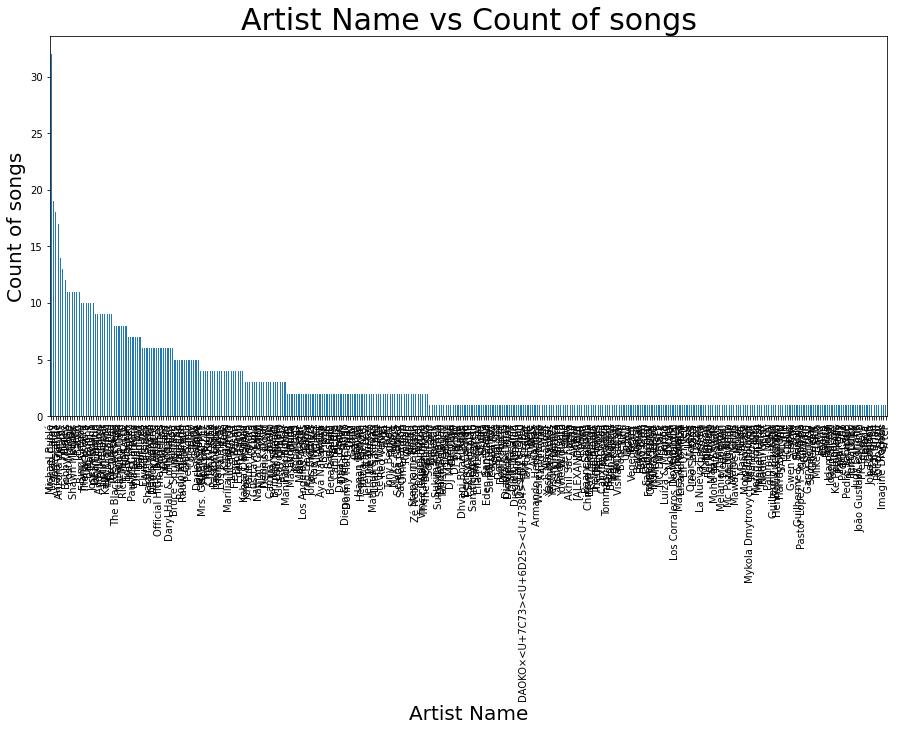

In [152]:
fig = plt.figure(figsize = (15,7)) #form of the graph
df.groupby('artist')['title'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 20) #name of x side
plt.ylabel('Count of songs', fontsize = 20) #name of y side
plt.title('Artist Name vs Count of songs', fontsize = 30) #general title
#

### Q2:What genre is the most listened to? And provide examples.

This graph illustrates the amount of various typ of genres used in Spotify. 

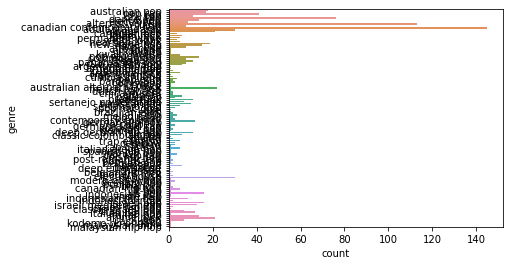

In [153]:
# plotting between Genre and count
sns.countplot(data=df,y='genre')
#count of genres and explain by graph

To be continued....